#Preprocess

##Import Library & Read Data

In [1]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np

In [2]:
# Membaca data
df = pd.read_csv("DataBefore_3.csv", encoding='ISO-8859-1')
df.head()

,Timestamp,ð Usia Anda saat ini,ð Semester Anda saat ini,ð Berapa kali Anda pernah menjalin hubungan romantis? (Pacaran &/ HTS),â±ï¸ Berapa rata-rata durasi hubungan Anda (dalam bulan)?,ð Berapa kali biasanya Anda berkencan dalam sebulan?\n(Misal: '2' kali/sebulan),ð Saya merasa puas dengan hubungan saya.,ð Saya merasakan cinta yang kuat dalam hubungan saya.,ð£ï¸ Komunikasi dengan pasangan berjalan baik dan terbuka.,ð¨âð©âð§âð¦ Saya mendapatkan dukungan dari teman & keluarga.,...,ð¥ Seberapa sering konflik terjadi dalam hubungan?,ð¤ Saya dan pasangan mampu menyelesaikan konflik dengan baik.,ð Hubungan saya memengaruhi performa akademik saya.,"ðð Jika ada perubahan, bagaimana perubahan IPK Anda?",ð§ Hubungan romantis terakhir Anda lebih cenderung...,ð« Bagaimana Anda bertemu dengan pasangan terakhir Anda?,ð¤ Jenis Kelamin,ð§ Fakultas dari Jurusan Anda,ð Apakah Anda saat ini sedang berada dalam hubungan romantis? (Pacaran &/ HTS),ð Apakah sebelumnya sudah pernah berada dalam hubungan romantis? (Pacaran &/ HTS)
0,5/13/2025 13:54:52,20,Semester 4,3.0,12.0,16.0,4.0,5.0,4.0,5.0,...,3.0,4.0,Ya,Naik,Sangat mendukung ð,Di kampus/organisasi ð«,Laki-laki,School of Computer Science,Ya,Pernah
1,5/14/2025 10:02:17,20,Semester 4,2.0,12.0,8.0,5.0,5.0,5.0,5.0,...,3.0,4.0,Tidak,NaN,Cukup mendukung ð,"Media sosial (Instagram, Twitter, dsb.) ð±",Laki-laki,School of Computer Science,Ya,Pernah
2,5/14/2025 10:04:06,19,Semester 4,2.0,48.0,4.0,5.0,5.0,4.0,4.0,...,5.0,4.0,Tidak,NaN,Netral ð,Melalui teman ð¤,Laki-laki,School of Computer Science,Ya,Pernah
3,5/14/2025 12:27:38,19,Semester 4,3.0,30.0,4.0,5.0,5.0,5.0,4.0,...,2.0,5.0,Ya,Turun,Sangat mendukung ð,Melalui teman ð¤,Laki-laki,School of Computer Science,Ya,Pernah
4,5/14/2025 12:29:30,20,Semester 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Laki-laki,School of Computer Science,NaN,Belum pernah


##Mengolah Data Keseluruhan

In [3]:
# Menghapus kolom 'Timestamp' dari df_pernah
df = df.drop('Timestamp', axis=1)

In [4]:
# Melihat info data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0     ð Usia Anda saat ini                                                                438 non-null    int64  
 1     ð Semester Anda saat ini                                                            438 non-null    object 
 2     ð Berapa kali Anda pernah menjalin hubungan romantis? (Pacaran &/ HTS)              350 non-null    float64
 3     â±ï¸ Berapa rata-rata durasi hubungan Anda (dalam bulan)?                            350 non-null    float64
 4     ð Berapa kali biasanya Anda berkencan dalam sebulan?
(Misal: '2' kali/sebulan)      350 non-null    float64
 5     ð Saya merasa puas dengan hubungan saya.                   

In [5]:
df.columns = df.columns.str.replace(r"[\n\r\t]", "", regex=True).str.strip()

In [6]:
# BUANG EMOJI DI SELURUH DATASET
import pandas as pd
import re

# Sample cleaning function: remove non-ASCII characters and trim whitespace
def clean_text(val):
    if isinstance(val, str):
        val = re.sub(r'[^\x00-\x7F]+', '', val)  # Remove non-ASCII characters
        val = val.strip()  # Trim leading/trailing whitespace
    return val

# Clean column names
df.columns = [clean_text(col) for col in df.columns]

# Clean all string values in the DataFrame
df = df.applymap(clean_text)

In [7]:
cleaned_rename_dict = {
    k.replace('\n', '').replace('\r', '').replace('\t', '').strip(): v
    for k, v in {
      'Usia Anda saat ini': 'Usia Responden',
      'Semester Anda saat ini': 'Semester Responden',
      'Berapa kali Anda pernah menjalin hubungan romantis? (Pacaran &/ HTS)': 'Jumlah Hubungan Responden',
      'Berapa rata-rata durasi hubungan Anda (dalam bulan)?': 'Durasi Rata-rata Hubungan Responden',
      "Berapa kali biasanya Anda berkencan dalam sebulan?(Misal: '2' kali/sebulan)": 'Jumlah Kencan Responden',
      'Saya merasa puas dengan hubungan saya.': 'Tingkat Kepuasan Responden dalam Hubungan',
      'Saya merasakan cinta yang kuat dalam hubungan saya.': 'Tingkat Kekuatan Cinta Responden dalam Hubungan',
      'Komunikasi dengan pasangan berjalan baik dan terbuka.': 'Tingkat Keterbukaan Komunikasi Responden dalam Hubungan',
      'Saya mendapatkan dukungan dari teman & keluarga.': 'Respon Teman & Keluarga terhadap Hubungan Responden',
      'Media sosial berpengaruh terhadap hubungan saya.': 'Pengaruh Media Sosial terhadap Hubungan Responden',
      'Seberapa sering konflik terjadi dalam hubungan?': 'Frekuensi Konflik dalam Hubungan Responden',
      'Saya dan pasangan mampu menyelesaikan konflik dengan baik.': 'Penyelesaian Responden & Pasangan terhadap Konflik',
      'Hubungan saya memengaruhi performa akademik saya.': 'Pengaruh Hubungan terhadap Performa Akademik Responden',
      'Jika ada perubahan, bagaimana perubahan IPK Anda?': 'Perubahan IPK yang Dialami Responden',
      'Hubungan romantis terakhir Anda lebih cenderung...': 'Pendapat Responden terhadap Hubungan Terakhir',
      'Bagaimana Anda bertemu dengan pasangan terakhir Anda?': 'Media atau Bagaimana Responden Bertemu dengan Pasangan',
      'Jenis Kelamin': 'Jenis Kelamin',
      'Fakultas dari Jurusan Anda': 'Fakultas Responden',
      'Apakah Anda saat ini sedang berada dalam hubungan romantis? (Pacaran &/ HTS)': 'Status Responden Saat Ini',
      'Apakah sebelumnya sudah pernah berada dalam hubungan romantis? (Pacaran &/ HTS)': 'Status Responden Sebelumnya'
    }.items()
}

In [8]:
df = df.rename(columns=cleaned_rename_dict)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Usia Responden                                           438 non-null    int64  
 1   Semester Responden                                       438 non-null    object 
 2   Jumlah Hubungan Responden                                350 non-null    float64
 3   Durasi Rata-rata Hubungan Responden                      350 non-null    float64
 4   Jumlah Kencan Responden                                  350 non-null    float64
 5   Tingkat Kepuasan Responden dalam Hubungan                350 non-null    float64
 6   Tingkat Kekuatan Cinta Responden dalam Hubungan          350 non-null    float64
 7   Tingkat Keterbukaan Komunikasi Responden dalam Hubungan  350 non-null    float64
 8   Respon Teman & Keluarga terhad

In [10]:
# Mengecek nilai kosong pada data
df.isnull().sum()

Usia Responden                                               0
Semester Responden                                           0
Jumlah Hubungan Responden                                   88
Durasi Rata-rata Hubungan Responden                         88
Jumlah Kencan Responden                                     88
Tingkat Kepuasan Responden dalam Hubungan                   88
Tingkat Kekuatan Cinta Responden dalam Hubungan             88
Tingkat Keterbukaan Komunikasi Responden dalam Hubungan     88
Respon Teman & Keluarga terhadap Hubungan Responden         88
Pengaruh Media Sosial terhadap Hubungan Responden           88
Frekuensi Konflik dalam Hubungan Responden                  88
Penyelesaian Responden & Pasangan terhadap Konflik          88
Pengaruh Hubungan terhadap Performa Akademik Responden      88
Perubahan IPK yang Dialami Responden                       292
Pendapat Responden terhadap Hubungan Terakhir               88
Media atau Bagaimana Responden Bertemu dengan Pasangan 

### Mengubah (Encode) Data df (Keseluruhan)

In [11]:
# Mengubah nilai-nilai data pada kolom 'Semester Responden' menjadi numerik
df['Semester Responden'].unique()

array(['Semester 4', 'Semester 2', 'Semester 6', 'Semester 3'],
      dtype=object)

In [12]:
# Mengubah nilai-nilai data pada kolom 'Semester Responden'
mapping = {
    'Semester 2': 2,
    'Semester 4': 4,
    'Semester 6': 6
}
df['Semester Responden'] = df['Semester Responden'].map(mapping)

In [13]:
# Mengubah nilai-nilai data pada kolom 'Jenis Kelamin' menjadi numerik
df['Jenis Kelamin'].unique()

array(['Laki-laki', 'Perempuan'], dtype=object)

In [14]:
# Mengubah nilai-nilai data pada kolom 'Jenis Kelamin'
mapping = {
    'Laki-laki': 1,
    'Perempuan': 0
}
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(mapping)

In [15]:
# Mengubah nilai-nilai data pada kolom 'Fakultas Responden' menjadi numerik
df['Fakultas Responden'].unique()

array(['School of Computer Science', 'Faculty of Engineering',
       'School of Accounting', 'Faculty of Humanities',
       'Faculty of Digital Communication and Hotel and Tourism',
       'BINUS Business School', 'School of Information Systems',
       'School of Design'], dtype=object)

In [16]:
# Mengubah nilai-nilai data pada kolom 'Fakultas Responden'
mapping = {
    'School of Computer Science': 1,
    'Faculty of Engineering': 2,
    'School of Accounting': 3,
    'Faculty of Humanities': 4,
    'Faculty of Digital Communication and Hotel and Tourism': 5,
    'BINUS Business School': 6,
    'School of Information Systems': 7,
    'School of Design': 8
}
df['Fakultas Responden'] = df['Fakultas Responden'].map(mapping)

In [17]:
# Mengubah nilai-nilai data pada kolom 'Status Responden Masa Lalu'
df['Status Responden Sebelumnya'].unique()

array(['Pernah', 'Belum pernah'], dtype=object)

In [18]:
# Mengubah nilai-nilai data pada kolom 'Status Responden Sebelumnya'
mapping = {
    'Pernah': 1,
    'Belum pernah': 0
}
df['Status Responden Sebelumnya'] = df['Status Responden Sebelumnya'].map(mapping)

In [19]:
# Menampilkan hasil perubahan
df.head()

,Usia Responden,Semester Responden,Jumlah Hubungan Responden,Durasi Rata-rata Hubungan Responden,Jumlah Kencan Responden,Tingkat Kepuasan Responden dalam Hubungan,Tingkat Kekuatan Cinta Responden dalam Hubungan,Tingkat Keterbukaan Komunikasi Responden dalam Hubungan,Respon Teman & Keluarga terhadap Hubungan Responden,Pengaruh Media Sosial terhadap Hubungan Responden,Frekuensi Konflik dalam Hubungan Responden,Penyelesaian Responden & Pasangan terhadap Konflik,Pengaruh Hubungan terhadap Performa Akademik Responden,Perubahan IPK yang Dialami Responden,Pendapat Responden terhadap Hubungan Terakhir,Media atau Bagaimana Responden Bertemu dengan Pasangan,Jenis Kelamin,Fakultas Responden,Status Responden Saat Ini,Status Responden Sebelumnya
0,20,4.0,3.0,12.0,16.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,Ya,Naik,Sangat mendukung,Di kampus/organisasi,1,1,Ya,1
1,20,4.0,2.0,12.0,8.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,Tidak,NaN,Cukup mendukung,"Media sosial (Instagram, Twitter, dsb.)",1,1,Ya,1
2,19,4.0,2.0,48.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,Tidak,NaN,Netral,Melalui teman,1,1,Ya,1
3,19,4.0,3.0,30.0,4.0,5.0,5.0,5.0,4.0,1.0,2.0,5.0,Ya,Turun,Sangat mendukung,Melalui teman,1,1,Ya,1
4,20,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0


## Memisahkan antara yang Sudah dengan yang Belum Pernah untuk kebutuhan analisis lebih lanjut

In [20]:
# Memisahkan antara data campuran dan data yang pernah berhubungan
df_campur = df
df_pernah = df[df['Status Responden Sebelumnya'] == 1]

In [21]:
df_pernah.head()

,Usia Responden,Semester Responden,Jumlah Hubungan Responden,Durasi Rata-rata Hubungan Responden,Jumlah Kencan Responden,Tingkat Kepuasan Responden dalam Hubungan,Tingkat Kekuatan Cinta Responden dalam Hubungan,Tingkat Keterbukaan Komunikasi Responden dalam Hubungan,Respon Teman & Keluarga terhadap Hubungan Responden,Pengaruh Media Sosial terhadap Hubungan Responden,Frekuensi Konflik dalam Hubungan Responden,Penyelesaian Responden & Pasangan terhadap Konflik,Pengaruh Hubungan terhadap Performa Akademik Responden,Perubahan IPK yang Dialami Responden,Pendapat Responden terhadap Hubungan Terakhir,Media atau Bagaimana Responden Bertemu dengan Pasangan,Jenis Kelamin,Fakultas Responden,Status Responden Saat Ini,Status Responden Sebelumnya
0,20,4.0,3.0,12.0,16.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,Ya,Naik,Sangat mendukung,Di kampus/organisasi,1,1,Ya,1
1,20,4.0,2.0,12.0,8.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,Tidak,NaN,Cukup mendukung,"Media sosial (Instagram, Twitter, dsb.)",1,1,Ya,1
2,19,4.0,2.0,48.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,Tidak,NaN,Netral,Melalui teman,1,1,Ya,1
3,19,4.0,3.0,30.0,4.0,5.0,5.0,5.0,4.0,1.0,2.0,5.0,Ya,Turun,Sangat mendukung,Melalui teman,1,1,Ya,1
5,19,4.0,1.0,8.0,6.0,2.0,2.0,1.0,2.0,4.0,4.0,2.0,Ya,Turun,Sangat mengganggu,sma,0,1,Ya,1


In [22]:
df_pernah['Durasi Rata-rata Hubungan Responden'].unique()

array([1.2e+01, 4.8e+01, 3.0e+01, 8.0e+00, 5.0e+00, 3.0e+00, 2.0e+00,
       2.4e+01, 7.0e+00, 6.0e+00, 1.0e+01, 2.0e+01, 1.0e+06, 9.0e+00,
       0.0e+00, 1.6e+01, 3.4e+01, 4.0e+00, 1.5e+01, 3.2e+01, 1.8e+01,
       2.3e+01, 1.1e+01, 1.0e+00, 7.4e+01, 1.3e+01, 2.5e+01, 1.9e+01,
       2.8e+01, 3.1e+01, 2.2e+01, 2.9e+01, 1.7e+01, 1.4e+01, 2.6e+01,
       3.5e+01, 3.3e+01, 2.7e+01, 3.6e+01, 2.1e+01])

In [23]:
# Mengubah nilai yang tidak masuk akal sebagai nilai null
df_pernah['Durasi Rata-rata Hubungan Responden'] = df_pernah['Durasi Rata-rata Hubungan Responden'].replace(1000000, np.nan)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Imputasi NA

In [24]:
df_pernah.isnull().sum()

Usia Responden                                               0
Semester Responden                                           0
Jumlah Hubungan Responden                                    0
Durasi Rata-rata Hubungan Responden                          1
Jumlah Kencan Responden                                      0
Tingkat Kepuasan Responden dalam Hubungan                    0
Tingkat Kekuatan Cinta Responden dalam Hubungan              0
Tingkat Keterbukaan Komunikasi Responden dalam Hubungan      0
Respon Teman & Keluarga terhadap Hubungan Responden          0
Pengaruh Media Sosial terhadap Hubungan Responden            0
Frekuensi Konflik dalam Hubungan Responden                   0
Penyelesaian Responden & Pasangan terhadap Konflik           0
Pengaruh Hubungan terhadap Performa Akademik Responden       0
Perubahan IPK yang Dialami Responden                       204
Pendapat Responden terhadap Hubungan Terakhir                0
Media atau Bagaimana Responden Bertemu dengan Pasangan 

In [25]:
# Imputasi nilai kosong pada variabel numerik dengan menggunakan mean
df_pernah.fillna(df_pernah.select_dtypes(include=['number']).mean(), inplace=True)

c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
# Mengisi nilai kosong pada kolom 'Perubahan IPK yang Dialami Responden' dengan 'Tidak Berpengaruh'
df_pernah['Perubahan IPK yang Dialami Responden'].fillna('Tidak Berpengaruh', inplace=True)

In [27]:
#Cek setelah NA
df_pernah.isnull().sum()

Usia Responden                                             0
Semester Responden                                         0
Jumlah Hubungan Responden                                  0
Durasi Rata-rata Hubungan Responden                        0
Jumlah Kencan Responden                                    0
Tingkat Kepuasan Responden dalam Hubungan                  0
Tingkat Kekuatan Cinta Responden dalam Hubungan            0
Tingkat Keterbukaan Komunikasi Responden dalam Hubungan    0
Respon Teman & Keluarga terhadap Hubungan Responden        0
Pengaruh Media Sosial terhadap Hubungan Responden          0
Frekuensi Konflik dalam Hubungan Responden                 0
Penyelesaian Responden & Pasangan terhadap Konflik         0
Pengaruh Hubungan terhadap Performa Akademik Responden     0
Perubahan IPK yang Dialami Responden                       0
Pendapat Responden terhadap Hubungan Terakhir              0
Media atau Bagaimana Responden Bertemu dengan Pasangan     0
Jenis Kelamin           

### Mengubah (Encode) Nilai

In [28]:
df_pernah.head()

,Usia Responden,Semester Responden,Jumlah Hubungan Responden,Durasi Rata-rata Hubungan Responden,Jumlah Kencan Responden,Tingkat Kepuasan Responden dalam Hubungan,Tingkat Kekuatan Cinta Responden dalam Hubungan,Tingkat Keterbukaan Komunikasi Responden dalam Hubungan,Respon Teman & Keluarga terhadap Hubungan Responden,Pengaruh Media Sosial terhadap Hubungan Responden,Frekuensi Konflik dalam Hubungan Responden,Penyelesaian Responden & Pasangan terhadap Konflik,Pengaruh Hubungan terhadap Performa Akademik Responden,Perubahan IPK yang Dialami Responden,Pendapat Responden terhadap Hubungan Terakhir,Media atau Bagaimana Responden Bertemu dengan Pasangan,Jenis Kelamin,Fakultas Responden,Status Responden Saat Ini,Status Responden Sebelumnya
0,20,4.0,3.0,12.0,16.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,Ya,Naik,Sangat mendukung,Di kampus/organisasi,1,1,Ya,1
1,20,4.0,2.0,12.0,8.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,Tidak,Tidak Berpengaruh,Cukup mendukung,"Media sosial (Instagram, Twitter, dsb.)",1,1,Ya,1
2,19,4.0,2.0,48.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,Tidak,Tidak Berpengaruh,Netral,Melalui teman,1,1,Ya,1
3,19,4.0,3.0,30.0,4.0,5.0,5.0,5.0,4.0,1.0,2.0,5.0,Ya,Turun,Sangat mendukung,Melalui teman,1,1,Ya,1
5,19,4.0,1.0,8.0,6.0,2.0,2.0,1.0,2.0,4.0,4.0,2.0,Ya,Turun,Sangat mengganggu,sma,0,1,Ya,1


In [29]:
# Mengubah nilai-nilai data pada kolom 'Pengaruh Hubungan terhadap Performa Akademik Responden' menjadi numerik
df_pernah['Pengaruh Hubungan terhadap Performa Akademik Responden'].unique()

array(['Ya', 'Tidak'], dtype=object)

In [30]:
# Mengubah nilai-nilai data pada kolom 'Pengaruh Hubungan terhadap Performa Akademik Responden'
mapping = {
    'Ya': 1,
    'Tidak': 0
}
df_pernah['Pengaruh Hubungan terhadap Performa Akademik Responden'] = df_pernah['Pengaruh Hubungan terhadap Performa Akademik Responden'].map(mapping)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Mengubah nilai-nilai data pada kolom 'Perubahan IPK yang Dialami Responden' menjadi numerik
df_pernah['Perubahan IPK yang Dialami Responden'].unique()

array(['Naik', 'Tidak Berpengaruh', 'Turun'], dtype=object)

In [32]:
# Mengubah nilai-nilai data pada kolom 'Perubahan IPK yang Dialami Responden'
mapping = {
    'Naik': 1,
    'Tidak Berpengaruh': 0,
    'Turun': -1
}
df_pernah['Perubahan IPK yang Dialami Responden'] = df_pernah['Perubahan IPK yang Dialami Responden'].map(mapping)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
# Mengubah nilai-nilai data pada kolom 'Pendapat Responden terhadap Hubungan Terakhir' menjadi numerik
df_pernah['Pendapat Responden terhadap Hubungan Terakhir'].unique()

array(['Sangat mendukung', 'Cukup mendukung', 'Netral',
       'Sangat mengganggu', 'Cukup mengganggu'], dtype=object)

In [34]:
# Mengubah nilai-nilai data pada kolom 'Pendapat Responden terhadap Hubungan Terakhir'
mapping = {
    'Sangat mendukung': 5,
    'Cukup mendukung': 4,
    'Netral': 3,
    'Sangat mengganggu': 2,
    'Cukup mengganggu': 1
}
df_pernah['Pendapat Responden terhadap Hubungan Terakhir'] = df_pernah['Pendapat Responden terhadap Hubungan Terakhir'].map(mapping)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [35]:
# Mengubah nilai-nilai data pada kolom 'Media atau Bagaimana Responden Bertemu dengan Pasangan' menjadi numerik
df['Media atau Bagaimana Responden Bertemu dengan Pasangan'].unique()

array(['Di kampus/organisasi', 'Media sosial (Instagram, Twitter, dsb.)',
       'Melalui teman', nan, 'sma',
       'Aplikasi kencan (Tinder, Bumble, dll)', 'Sekolah', 'Badmin',
       'Game online', 'SMA', 'sekolah SMA', 'Gereja', 'Di SMA', 'sekolah',
       'teman sekolah'], dtype=object)

In [36]:
# Mengubah nilai-nilai data pada kolom 'Media atau Bagaimana Responden Bertemu dengan Pasangan'
mapping = {
    'Di kampus/organisasi': 0,
    'Media sosial (Instagram, Twitter, dsb.)': 1,
    'Melalui teman': 2,
    'Badmin ': 2,
    'sma': 3,
    'Sekolah ': 3,
    'Sekolah': 3,
    'sekolah': 3,
    'SMA': 3,
    'sekolah SMA': 3,
    'Di SMA': 3,
    'teman sekolah': 4,
    'Gereja': 5,
    'Game online': 6,
    'Aplikasi kencan (Tinder, Bumble, dll)': 7
}
df_pernah['Media atau Bagaimana Responden Bertemu dengan Pasangan'] = df_pernah['Media atau Bagaimana Responden Bertemu dengan Pasangan'].map(mapping)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
# Mengubah nilai-nilai data pada kolom 'Status Responden Saat Ini' menjadi numerik
df_pernah['Status Responden Saat Ini'].unique()

array(['Ya', 'Tidak'], dtype=object)

In [38]:
# Mengubah nilai-nilai data pada kolom 'Status Responden Saat Ini'
mapping = {
    'Ya': 1,
    'Tidak': 0
}
df_pernah['Status Responden Saat Ini'] = df_pernah['Status Responden Saat Ini'].map(mapping)

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
# Menampilkan hasil perubahan
df_pernah.head()

,Usia Responden,Semester Responden,Jumlah Hubungan Responden,Durasi Rata-rata Hubungan Responden,Jumlah Kencan Responden,Tingkat Kepuasan Responden dalam Hubungan,Tingkat Kekuatan Cinta Responden dalam Hubungan,Tingkat Keterbukaan Komunikasi Responden dalam Hubungan,Respon Teman & Keluarga terhadap Hubungan Responden,Pengaruh Media Sosial terhadap Hubungan Responden,Frekuensi Konflik dalam Hubungan Responden,Penyelesaian Responden & Pasangan terhadap Konflik,Pengaruh Hubungan terhadap Performa Akademik Responden,Perubahan IPK yang Dialami Responden,Pendapat Responden terhadap Hubungan Terakhir,Media atau Bagaimana Responden Bertemu dengan Pasangan,Jenis Kelamin,Fakultas Responden,Status Responden Saat Ini,Status Responden Sebelumnya
0,20,4.0,3.0,12.0,16.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,1,1,5,0.0,1,1,1,1
1,20,4.0,2.0,12.0,8.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,0,0,4,1.0,1,1,1,1
2,19,4.0,2.0,48.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,0,0,3,2.0,1,1,1,1
3,19,4.0,3.0,30.0,4.0,5.0,5.0,5.0,4.0,1.0,2.0,5.0,1,-1,5,2.0,1,1,1,1
5,19,4.0,1.0,8.0,6.0,2.0,2.0,1.0,2.0,4.0,4.0,2.0,1,-1,2,3.0,0,1,1,1


In [40]:
# Menyimpan data yang telah diproses
df_pernah.to_csv('DataAfter_3.csv', index=False)
df_campur.to_csv('DataAfter_3 (campur).csv', index=False)

#5. Measurement Quality

In [41]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import pingouin as pg  # install dengan: pip install pingouin

# Pilih 5 variabel utama
mydata = df_pernah[[
    'Tingkat Kepuasan Responden dalam Hubungan',
    'Tingkat Kekuatan Cinta Responden dalam Hubungan',
    'Tingkat Keterbukaan Komunikasi Responden dalam Hubungan',
    'Respon Teman & Keluarga terhadap Hubungan Responden',
    'Penyelesaian Responden & Pasangan terhadap Konflik'
]]

c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [43]:
# ===============================
# Uji VALIDITAS: Corrected Item-Total Correlation
# ===============================
validity = {}
for col in mydata.columns:
    total_score = mydata.drop(columns=[col]).sum(axis=1)
    correlation = mydata[col].corr(total_score)
    validity[col] = correlation

# Tampilkan hasil uji validitas
validity_result = pd.DataFrame.from_dict(validity, orient='index', columns=['CITC'])
print("=== Corrected Item-Total Correlation (CITC) ===")
print(validity_result)

=== Corrected Item-Total Correlation (CITC) ===
                                                        CITC
Tingkat Kepuasan Responden dalam Hubungan           0.271693
Tingkat Kekuatan Cinta Responden dalam Hubungan     0.243738
Tingkat Keterbukaan Komunikasi Responden dalam ...  0.282583
Respon Teman & Keluarga terhadap Hubungan Respo...  0.175340
Penyelesaian Responden & Pasangan terhadap Konflik  0.261661


In [44]:
# ===============================
# Uji RELIABILITAS: Cronbach's Alpha
# ===============================
cb_alpha = pg.cronbach_alpha(data=mydata)
print("=== Cronbach's Alpha ===")
print(f"Cronbach Alpha: {cb_alpha[0]:.4f}")

=== Cronbach's Alpha ===
Cronbach Alpha: 0.4646


#6. PRELIMINARY ANALYSIS

##Perhitungan Mean dengan Confidence Interval 95% untuk Variabel Numerik

In [45]:
import pandas as pd
import numpy as np
from scipy import stats

# Ambil kolom numerik
numerical_cols = df_pernah.select_dtypes(include=['float64', 'int64']).columns

# Hitung mean dan confidence interval
ci_result = []

for col in numerical_cols:
    data = df_pernah[col].dropna()
    mean = data.mean()
    sem = stats.sem(data)  # standard error of the mean
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    ci_result.append({
        'Variable': col,
        'Mean': mean,
        '95% CI Lower': ci[0],
        '95% CI Upper': ci[1]
    })

ci_df = pd.DataFrame(ci_result)
print("=== Mean dan Confidence Interval 95% ===")
print(ci_df)

=== Mean dan Confidence Interval 95% ===
                                             Variable       Mean  \
0                                      Usia Responden  19.885714   
1                                  Semester Responden   3.971429   
2                           Jumlah Hubungan Responden   2.897143   
3                 Durasi Rata-rata Hubungan Responden  17.687679   
4                             Jumlah Kencan Responden   2.702857   
5           Tingkat Kepuasan Responden dalam Hubungan   3.494286   
6     Tingkat Kekuatan Cinta Responden dalam Hubungan   3.580000   
7   Tingkat Keterbukaan Komunikasi Responden dalam...   3.482857   
8   Respon Teman & Keluarga terhadap Hubungan Resp...   3.485714   
9   Pengaruh Media Sosial terhadap Hubungan Responden   3.382857   
10         Frekuensi Konflik dalam Hubungan Responden   3.311429   
11  Penyelesaian Responden & Pasangan terhadap Kon...   3.620000   
12  Pengaruh Hubungan terhadap Performa Akademik R...   0.417143   
13     

c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


##Visualisasi

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df_pernah, col):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()
    plt.show()

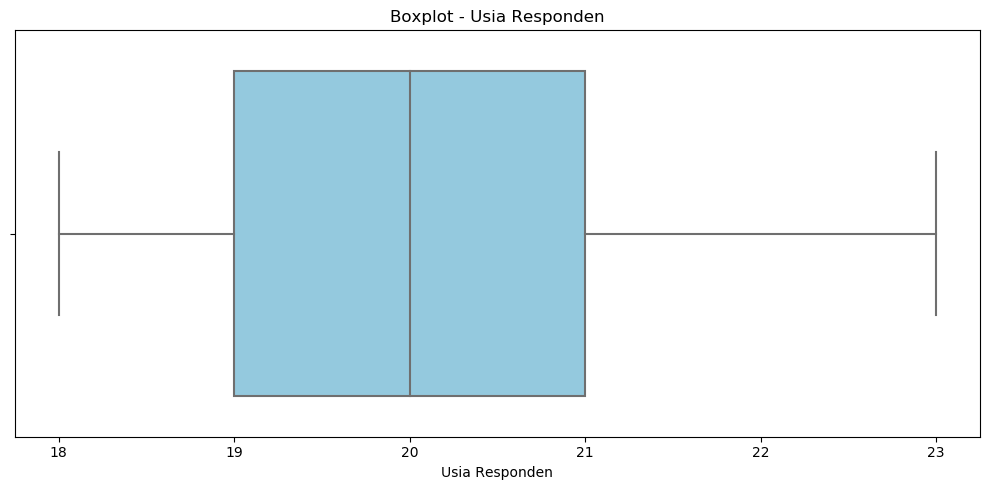

In [47]:
plot_boxplot(df_pernah, 'Usia Responden')

Nilai dari IQR berada di antara 19 dan 21 dimana responded berada didalam rentang usia remaja. Outlier tidak terlihat dalam boxplot ini.



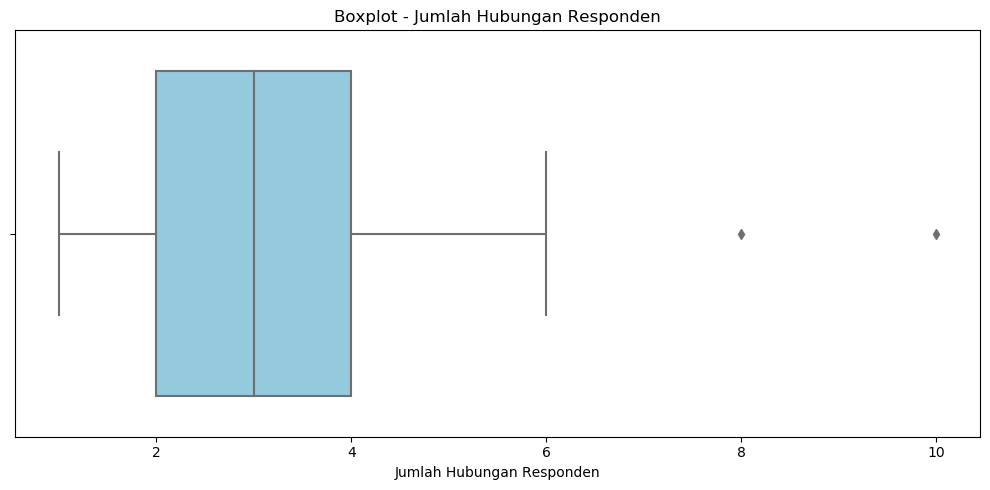

In [48]:
plot_boxplot(df_pernah, 'Jumlah Hubungan Responden')

Mayoritas responden berada di jumlah 1-6, yang menunjukan bahwa sebagian besar orang memiliki jumlah hubungan dalam rentang tersebut. Garis tengah yang menunjukan median berada di nilai 3. Terdapat 2 outlier yang berada di nilai 8 dan 10, yang berarti hubungan 8 dan 10 kali dianggap tidak wajar. IQR berada di rentang 2 sampai 4.

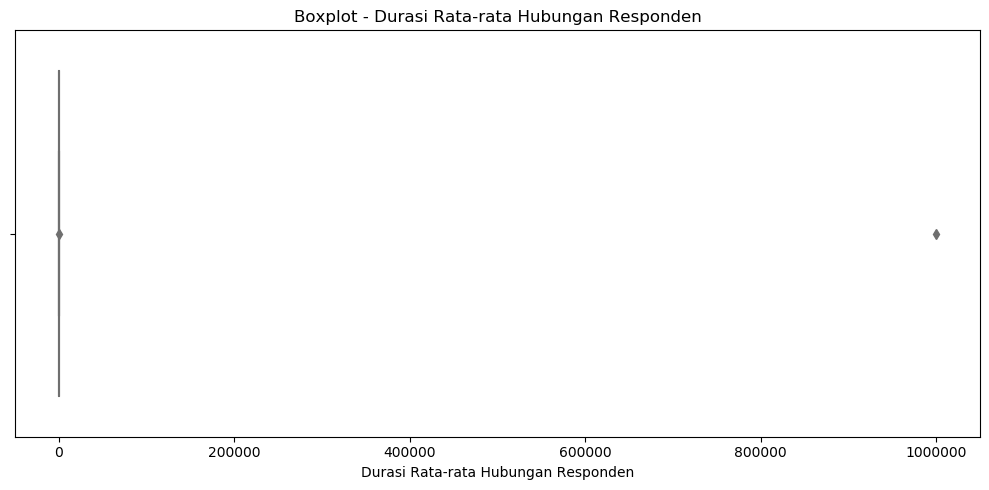

In [49]:
plot_boxplot(df_pernah, 'Durasi Rata-rata Hubungan Responden')

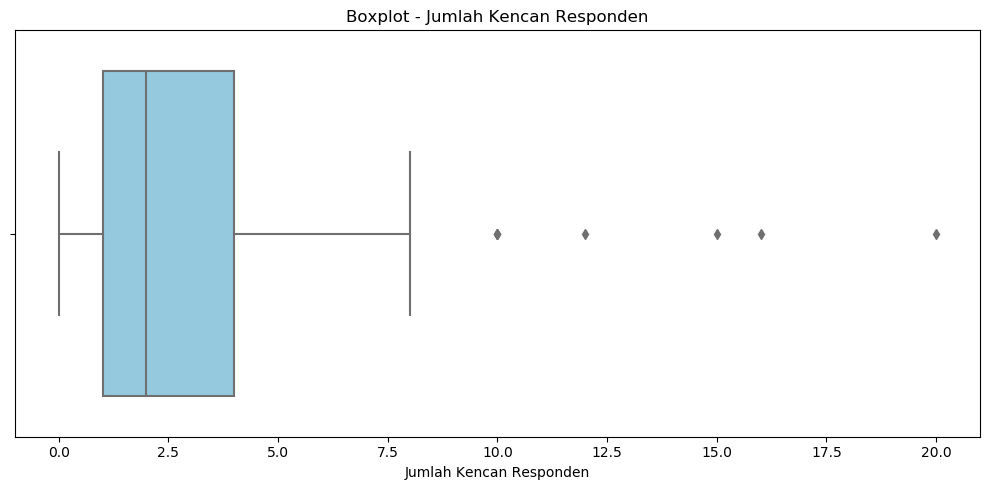

In [50]:
plot_boxplot(df_pernah, 'Jumlah Kencan Responden')

Variable 'Jumlah Kencan Responden' memiliki nilai outlier yang cukup banyak, kebanyakan berada di nilai 7.5 keatas. Nilai nilai ini dianggap tidak wajar. Mayoritas responden pernah berkencan di antara 1 sampai 4 kali

Durasi rata-rata dari responden adalah 9 sampai 25, dan ada outlier yang berada di nilai yang lebih dari 70

# Function to make Pie Plot

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pie_from_column(df, column, title='Pie Chart', colors=None, autopct='%1.1f%%'):
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    plt.figure(figsize=(6,6))
    plt.pie(sizes, labels=labels, colors=colors, autopct=autopct, startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()


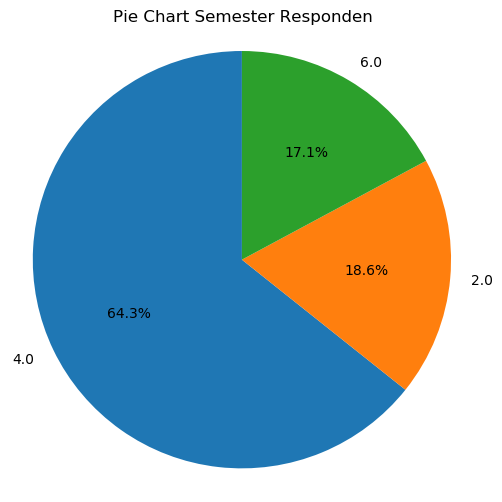

In [52]:
plot_pie_from_column(df_pernah, 'Semester Responden', title='Pie Chart Semester Responden')

Mayoritas responden kami sedang berada di semester 4, sisanya berada pada semester 2 sebesar 18.6% dan semester 6 sebesar 17.1%

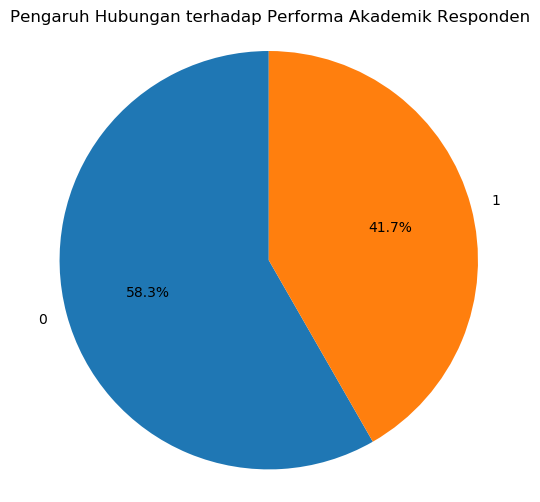

In [53]:
plot_pie_from_column(df_pernah, 'Pengaruh Hubungan terhadap Performa Akademik Responden', title='Pengaruh Hubungan terhadap Performa Akademik Responden')

Mayoritas hubungan responden tidak memengaruhi performa akademik dengan besar 58.3%, sedangkan sisanya sebesar 41.7% merasa bahwa hubungannya memengaruhi performa akademik

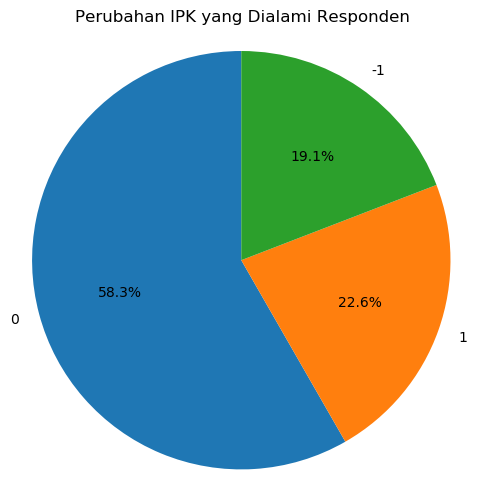

In [54]:
plot_pie_from_column(df_pernah, 'Perubahan IPK yang Dialami Responden', title='Perubahan IPK yang Dialami Responden')

Berdasarkan hasil, mayoritas responden tidak merasakan terjadinya perubahan IPK, sedangkan kurang dari 40% mengalaminya, dengan jumlah 22.6% mengalami kenaikan dan 19.1% mengalami penurunan

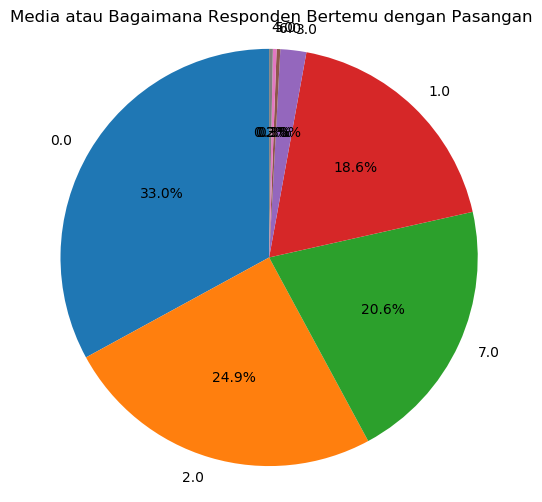

In [55]:
plot_pie_from_column(df_pernah, 'Media atau Bagaimana Responden Bertemu dengan Pasangan', title='Media atau Bagaimana Responden Bertemu dengan Pasangan')

Dari Pie Chart ini, dapat kami ketahui bahwa mayoritas responden kami bertemu dengan pasangannya saat berasa di Kampus / Organisasi dengan jumlah hampir mencapai 33%, 25.1% melalui teman, 20.6% melalui aplikasi kencan seperti Tinder, Bumble, etc. 18.6% melalui media sosial. Sisanya hampir kurang dari 5% menggunakan media lain, diluar pilihan peneliti, seperti SMA, Game Online, Hobi, Tempat Ibadah, etc.

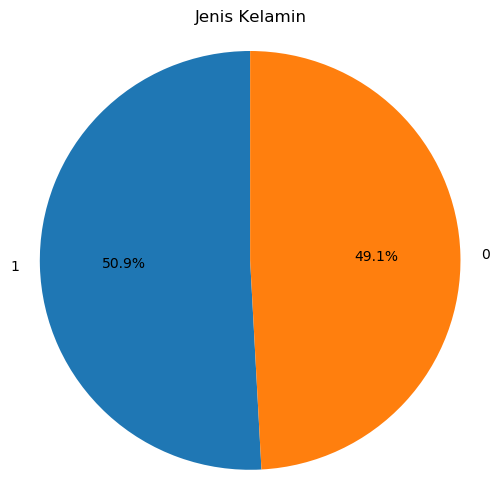

In [56]:
plot_pie_from_column(df_pernah, 'Jenis Kelamin', title='Jenis Kelamin')

Responden kami di dominasi dengan Laki - Laki sebanyak 50.9% dan perempuan sebanyak 49.1%

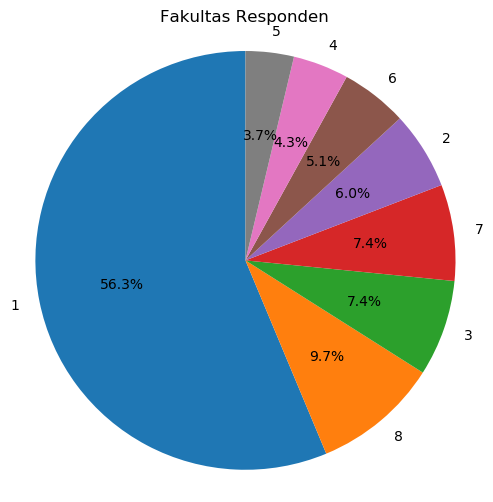

In [57]:
plot_pie_from_column(df_pernah, 'Fakultas Responden', title='Fakultas Responden')

Mayoritas responden kami berasal dari fakultas SoCS dengan jumlah sebesar 56.3%, dilanjutkan dengan School of Design dengan jumlah sebesar 9.7% dan School of Information System serta School of Accounting sebesar 7.4%


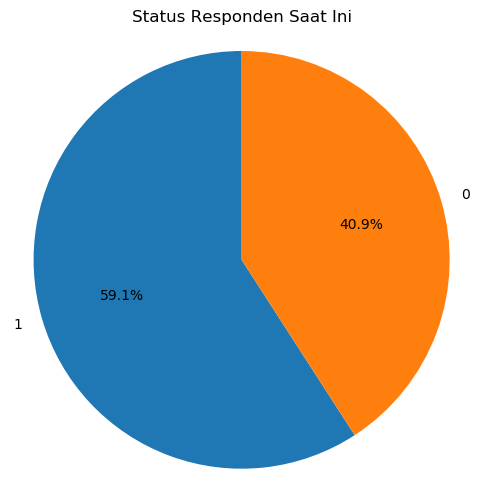

In [58]:
plot_pie_from_column(df_pernah, 'Status Responden Saat Ini', title='Status Responden Saat Ini')

Dalam Pie Chart ini, dapat dilihat bahwa mayoritas responden kami sedang dalam hubungan romantis dengan jumlah hampir mencapai 60%, sedangkan sisanya sebanyak 40.9% sedang tidak dalam hubungan romantis

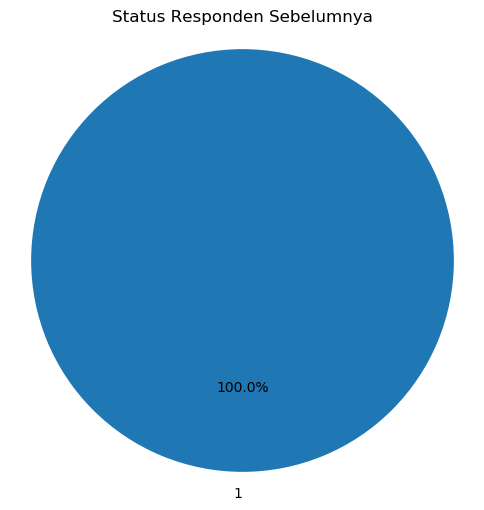

In [59]:
plot_pie_from_column(df_pernah, 'Status Responden Sebelumnya', title='Status Responden Sebelumnya')

Dari seluruh responden yang didapatkan, disimpulkan bahwa responden sudah pernah berada dalam hubungan romantis yakni pacaran maupun HTS

# Function untuk stacked barchart (skala likert)

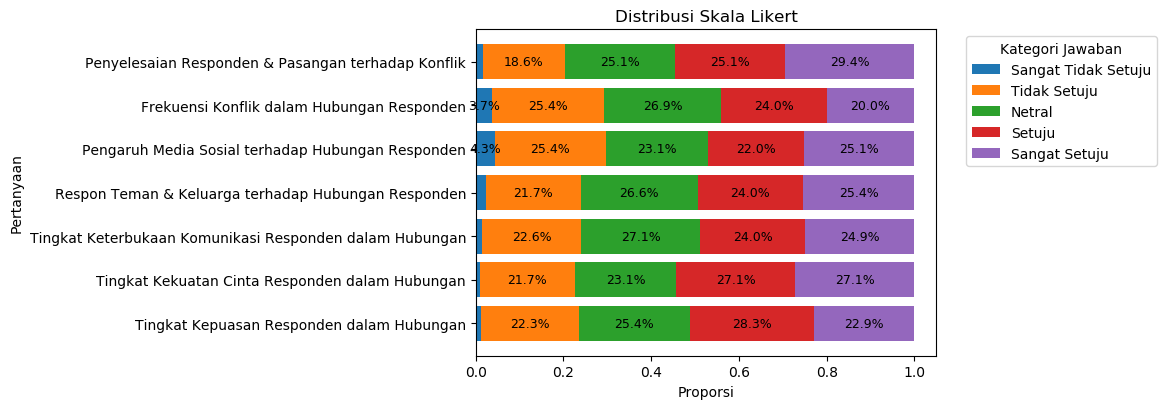

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

def plot_likert_stacked_bar(df, likert_columns, categories_order, category_labels, title='Distribusi Skala Likert'):
    """
    Membuat horizontal stacked bar chart dengan label Likert dan persentase.

    Parameters:
    - df: DataFrame
    - likert_columns: list of columns (pertanyaan-pertanyaan Likert)
    - categories_order: list of numeric Likert codes (misal: [1.0, 2.0, 3.0, 4.0, 5.0])
    - category_labels: label teks untuk legenda (panjangnya sama dengan categories_order)
    - title: judul chart
    """
    likert_data = pd.DataFrame()

    for col in likert_columns:
        counts = df[col].value_counts(normalize=True).reindex(categories_order, fill_value=0)
        likert_data[col] = counts

    likert_data = likert_data.T  # Transpose agar pertanyaan jadi baris

    # Plot
    fig, ax = plt.subplots(figsize=(12, len(likert_columns) * 0.6))
    left = [0] * len(likert_data)

    for idx, cat in enumerate(categories_order):
        heights = likert_data[cat]
        bars = ax.barh(likert_data.index, heights, left=left, label=category_labels[idx])

        # Tambahkan persentase pada masing-masing segmen
        for bar in bars:
            width = bar.get_width()
            if width > 0.03:  # tampilkan label jika >3%
                ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                        f'{width*100:.1f}%', ha='center', va='center', fontsize=9, color='black')

        # Update posisi "left" untuk bar berikutnya
        left = [i + j for i, j in zip(left, heights)]

    ax.set_title(title)
    ax.set_xlabel('Proporsi')
    ax.set_ylabel('Pertanyaan')
    ax.legend(title='Kategori Jawaban', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


likert_columns = [
    'Tingkat Kepuasan Responden dalam Hubungan',
    'Tingkat Kekuatan Cinta Responden dalam Hubungan',
    'Tingkat Keterbukaan Komunikasi Responden dalam Hubungan',
    'Respon Teman & Keluarga terhadap Hubungan Responden',
    'Pengaruh Media Sosial terhadap Hubungan Responden',
    'Frekuensi Konflik dalam Hubungan Responden',
    'Penyelesaian Responden & Pasangan terhadap Konflik'
]

categories_order = [1.0, 2.0, 3.0, 4.0, 5.0]
category_labels = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

plot_likert_stacked_bar(df_pernah, likert_columns, categories_order, category_labels)



Penyelesaian Konflik oleh Responden & Pasangan
Mayoritas responden menyatakan setuju atau sangat setuju bahwa mereka mampu menyelesaikan konflik dengan baik (sekitar 54.5%), menunjukkan kemampuan penyelesaian konflik yang relatif tinggi.

Frekuensi Konflik dalam Hubungan
Jawaban tersebar merata, namun sebagian besar netral atau tidak setuju bahwa konflik sering terjadi, mengindikasikan bahwa konflik tidak terlalu sering terjadi dalam hubungan responden.

Pengaruh Media Sosial terhadap Hubungan
Cukup banyak responden netral atau tidak setuju bahwa media sosial berpengaruh pada hubungan mereka. Artinya, sebagian besar mungkin tidak terlalu terpengaruh oleh media sosial dalam menjalin hubungan.

Dukungan Teman & Keluarga
Lebih dari setengah responden merasa mendapatkan dukungan dari orang terdekat mereka (sekitar 50% setuju atau sangat setuju), yang menjadi faktor positif dalam hubungan mereka.

Keterbukaan Komunikasi
Tingkat keterbukaan komunikasi cukup baik, dengan lebih dari 50% responden setuju atau sangat setuju, menandakan komunikasi terbuka dengan pasangan mereka.

Kekuatan Cinta dalam Hubungan
Hampir seimbang antara yang setuju dan sangat setuju (~54% total), dengan sedikit yang netral, mengindikasikan adanya perasaan cinta yang kuat dalam hubungan mereka.

Tingkat Kepuasan dalam Hubungan
Jawaban didominasi oleh "Setuju" dan "Netral", namun cukup banyak yang menjawab “Sangat Setuju” juga, menunjukkan tingkat kepuasan yang cukup tinggi, meskipun ada ruang untuk peningkatan.

C:\Users\user id\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


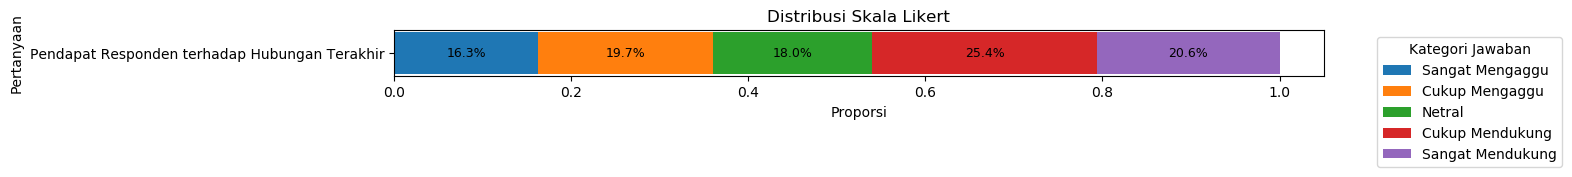

In [61]:
likert_columns = ['Pendapat Responden terhadap Hubungan Terakhir']

category_labels = ['Sangat Mengaggu', 'Cukup Mengaggu', 'Netral', 'Cukup Mendukung', 'Sangat Mendukung']

plot_likert_stacked_bar(df_pernah, likert_columns, categories_order, category_labels)

Sebagian besar responden (46%) merasa hubungan terakhir mereka mendukung, sementara 36% merasa terganggu, dan sisanya netral. Ini menunjukkan bahwa pengalaman hubungan romantis terakhir cenderung lebih banyak memberikan dampak positif dibanding negatif.

#Code Machine Learning

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Load Data
df = pd.read_csv("DataAfter_3.csv")  # Ganti dengan nama file atau sesuaikan dengan data Anda

# 2. Tentukan fitur dan target
X = df.drop(columns=["Pendapat Responden terhadap Hubungan Terakhir"])
y = df["Pendapat Responden terhadap Hubungan Terakhir"]

# 3. Deteksi kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [col for col in X.columns if col not in num_cols]

# 4. Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# 5. Buat pipeline akhir
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Fit model
model.fit(X_train, y_train)

# 8. Prediksi & evaluasi
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.24285714285714285

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.33      0.43      0.38        14
           3       0.18      0.15      0.17        13
           4       0.23      0.39      0.29        18
           5       0.18      0.14      0.16        14

    accuracy                           0.24        70
   macro avg       0.19      0.22      0.20        70
weighted avg       0.20      0.24      0.21        70



c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user id\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

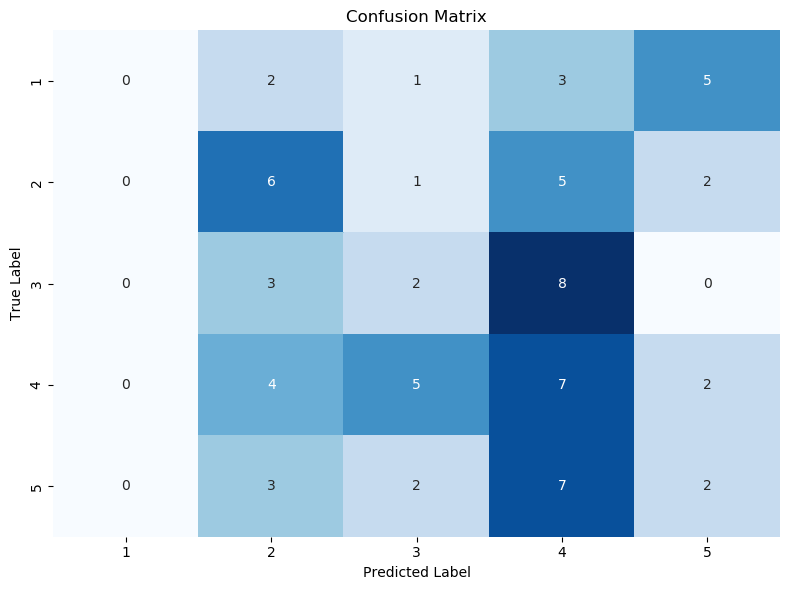

In [63]:
# Confusion Matrix visual
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()